<h1> Pixar Movie data visualisation </h1>
<p>
    This notebook is derived from the guided project in <a href="https://www.dataquest.io/">DataQuest.io</a>.
    In this notebook, I will go through the data visualisation of pixar's movie and see what insight I can develop in this dataset by using ipython notebook.
</p>
<p>
    The part of rating in this dataset is from <a href="https://github.com/apalbright">Alex Albright</a>'s <a href="https://github.com/apalbright/Pixar/blob/master/Pixar.csv">GitHub repo</a>.
    Please visit her great <a href="https://thelittledataset.com/">website</a> to find more data-driven projects including the visualisation of this dataset via R <a href="https://thelittledataset.com/2015/06/30/the-multidimensional-success-of-pixar-films-visualized/">here</a>.
    The other parts of data like opening weekend, gross, etc, are gathered by Dataquest.io from 
    <a href="http://www.boxofficemojo.com/">Box Office Mojo</a>.
</p>
<p>
    This notebook is a practice of what I know and also a note for myself to review in the future in case I forget anything. So in the most of steps, I will add a markdown to illustrate the step and maybe some relavent information, and might make the notebook looks tedious. I might build another cleaning version later. 
</p>
<p>
    Please feel free to send me a message via james.lee.yichan@gmail.com if you have any comment, suggestion, etc..
</p>


<h3> Step 1: import useful packages </h3>

<h4> Pandas </h4>
<p>
    Pandas is a useful tool for data management and data structure.
    Its most important object is Dataframe 
    which equipped with a bunch of methods for manipulating and exploring structured data.<br/>
    <a href="http://pandas.pydata.org/pandas-docs/stable/10min.html">Here is a 10 minutes tutorial for pandas.</a>
</p>

<h4> Numpy </h4>
<p>
    <a href="http://www.numpy.org/">Numpy</a> is a poweful tool making python able to deal with n-dim array.
</p>

<h4> Matplotlib </h4>
<p>
    Matplotlib is a python plotting library.
    Its pyplot interface is Matlab-like. 
    It contains both easy-to-use interface and step-by-step drawing methods.<br/>
    <a href="http://matplotlib.org/users/beginner.html">Here is its beginner guide</a>
</p>

<h4> Seaborn </h4>
<p>
    It's also a plotting tool based on matplotlib.
    It's interface is very simple to use and also the theme of most of graph is well tuned,
    which means people like me having no sense of beauty don't need to worry about how to match the color, ratio, etc.
    to make a nice bar chart. I comment it so we can keep the original style of matplotlib and so readers can see the difference.<br/>
<b>Two important notes:</b>
    <ol>
        <li>
            After import seaborn, the default plotsetting of matplotlib will be overwrote.
            In other words, even you call a plot method of matplotlib but not from seaborn,
            the format of plot is still not the original matplot setting.
        </li>
        <li>
            Outliers of box plot from matplotlib are disapear if I import seaborn. I will discuss more details later.
        </li>
    </ol>
</p>

<h4> Requests </h4>
<p>
    A package helps us to access the content of website such as html source file or API. Click <a href="http://docs.python-requests.org/en/master/">Here</a> for detail.
</p>

<h4> beautifulsoup4 </h4>
<p>
    A package helps us extracting the data we need from html files. <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">Here</a> for more information.
    <b>Important note:</b> The package name used for import is bs4 instead of beautiful-soup or beautifulsoup4. I haven't figured out the reason. 
</p>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
# import seaborn as sns

import requests
import bs4

%matplotlib inline

<h3> Step 2: Read the CSV file </h3>
<p>
    pandas.read_csv reads Comma-separated values (CSV) file into a Dataframe object. <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html">Here</a> for more detail about Dataframe object.
</p>


In [2]:
pixar_movies = pd.read_csv("data/PixarMovies.csv")

<h3>Step 3: A quick survey of data</h3>
<p>
    Dataframe.shape gives the number of rows and columns of the dataframe.<br/>
    (15, 16) here means there are 15 movies in the data and 16 features about these movies
</p>

In [3]:
pixar_movies.shape

(15, 16)

Dataframe.dtypes to me is quite useful. It returns the column name and their datatype. So I can clear see what features this data has. So in pixar_movies, there are int, float and object data. String will be shown as object instead of str.

In [4]:
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

If I want see more clearly, I would use Dataframe.head() to see the first few rows of data. 
<a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html">Here</a> is its documentation.

In [5]:
pixar_movies.head()

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4.0,1.0


Another quick survey method, especially useful for numeric type of data, is Dataframe.describe().

In [6]:
pixar_movies.describe()

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Production Budget,Oscars Nominated,Oscars Won
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,14.000000
mean,2006.066667,101.533333,89.333333,7.846667,82.800000,67.990667,612.486667,258.506667,318.448000,353.986667,133.400000,2.857143,0.785714
std,5.933761,9.927355,16.451950,0.655599,12.119642,23.270468,190.193934,66.518284,73.321064,135.061615,59.696614,2.032700,0.801784
min,1995.000000,81.000000,39.000000,6.300000,57.000000,29.140000,362.000000,162.800000,194.430000,170.200000,30.000000,0.000000,0.000000
25%,2002.000000,96.000000,85.000000,7.300000,75.000000,58.755000,503.150000,215.100000,261.350000,256.050000,91.000000,1.000000,0.000000
50%,2007.000000,102.000000,96.000000,8.000000,88.000000,66.300000,559.900000,245.900000,318.900000,336.600000,150.000000,3.000000,1.000000
75%,2010.500000,109.000000,98.500000,8.300000,92.000000,76.450000,704.200000,280.750000,361.165000,427.800000,182.500000,4.750000,1.000000
max,2015.000000,116.000000,100.000000,8.800000,96.000000,110.310000,1063.200000,415.000000,457.460000,648.200000,200.000000,6.000000,2.000000


The count value returns number of non-NaN data in the column. Because there is 15 movies in this dataset, most count values are 15 except Oscar Nominated and Oscar Won. We can use pixar_movies["Oscars Nominated"] to access the column Oscars Nominated.<br/>
Each column of Dataframe is a pandas.Series object.
<a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html">Here</a> is its documentation.

In [7]:
pixar_movies["Oscars Nominated"]

0     3.0
1     1.0
2     1.0
3     3.0
4     4.0
5     4.0
6     2.0
7     5.0
8     6.0
9     5.0
10    5.0
11    0.0
12    1.0
13    0.0
14    NaN
Name: Oscars Nominated, dtype: float64

To see which movie with NaN in Oscar Nominated column, assuming the dataset is large and we don't want to find it by eye, we can use pixar_movies[pixar_movies["Oscars Nominated"].isnull()]. pandas.Series.isnull() returns a Series with boolean variable (True/False) in it. There are many ways to select rows of a Dataframe object, and one of them is using boolean array. For more detail about selecting data see <a href="http://pandas.pydata.org/pandas-docs/stable/indexing.html">here</a>.

In [8]:
pixar_movies[pixar_movies["Oscars Nominated"].isnull()]

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
14,2015,Inside Out,102,98,8.8,93,90.4,677.1,340.5,340.5,336.6,50.29%,49.71%,175,NaN,NaN


Since this data was established before Oscar 2015, so Inside Out has no Oscar related data by the time.

<h4>What did I find from a quick survey?</h4>
<ul>
    <li>
        There are 16 features in this dataset:
        <ul>
            <li> Year Released </li>
            <li> Movie name</li>
            <li> Length of movie (in mins) </li>
            <li> Score on <a href="https://www.rottentomatoes.com/">Rotten Tomatoes</a> (out of 100) </li>
            <li> Score on <a href="http://www.imdb.com/">IMDb</a> (out of 10) </li>
            <li> Score on <a href="http://www.metacritic.com/">Metacritic</a> (out of 100)</li>
            <li> Opening Weekend (The weekend box office for the initial week of release) </li>
            <li> Worldwide Gross </li>
            <li> Domestic Gross </li>
            <li> Adjusted Domestic Gross
                (<a href="http://www.boxofficemojo.com/alltime/adjusted.htm">Adjusted for for Ticket Price Inflation</a>)</li>
            <li> International Gross </li>
            <li> Domestic % </li>
            <li> International % </li>
            <li> Production Budget </li>
            <li> number of Oscars Nominations (Maximum is 6) </li>
            <li> number of Oscars Awards (Maximum is 2)</li>
        </ul>
    </li>
    <li>the data of Dometic % and International % are numeric but their data types are string with a % suffixed.</li>
    <li>Production Budget and Opening Weekend were not adjusted by inflation rates.</li>
    <li>Inside Out has no Oscar related data.
    
</ul>

### Step 4: Questions
Before I do any modification, I would like to write down what questions this dataset might be able to answer.
<ol>
    <li>What is the trend of Pixar movies in scores, income gross, budget?</li>
    <li>Which movie is most profitable?</li>
    <li>What is the trend in the portion of domestic gross and international gross?</li>
    <li>Is there any relation between Oscars Nominations and other features?</li>
</ol>

Some of these questions might be irrelavent, but I put it down as a record of brainstorm.

### Step 5: Data cleansing
Before extracting any information from a dataset, I need to check the data quality. For example, if I want to plot a figure of Domestic gross percentage, I need to remove the suffix % and convert their types from string to float. I also need to get the Adjusted Opening Weekend and Adjusted Production Budget if I want to compare them between different Pixar's movies.
<a href="https://en.wikipedia.org/wiki/Data_cleansing">Here</a> is the wiki page about data cleansing.

#### Data conversion

I first remove the suffix % of each string in column Domestic % by using method <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.html#pandas.Series.str">str</a> followed by <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.rstrip.html">rstrip</a>. Then I concatenated its output with method <a href"http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html">astype</a> to convert string to float.

In [9]:
pixar_movies["Domestic %"] = pixar_movies["Domestic %"].str.rstrip("%").astype(float)

I check this column to see if it really is something I want

In [10]:
pixar_movies["Domestic %"]

0     52.98
1     44.80
2     50.70
3     48.39
4     37.93
5     41.40
6     52.84
7     33.09
8     42.93
9     40.07
10    39.03
11    34.20
12    44.03
13    36.11
14    50.29
Name: Domestic %, dtype: float64

And do the same strip and conversion to column International %

In [11]:
pixar_movies["International %"] = pixar_movies["International %"].str.rstrip("%").astype(float)

And again, checking the whole dataset is what I expect.

In [12]:
pixar_movies

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4.0,1.0
5,2004,The Incredibles,115,97,8.0,90,70.47,631.4,261.4,341.28,370.0,41.40,58.60,92,4.0,2.0
6,2006,Cars,116,74,7.2,73,60.12,462.0,244.1,302.59,217.9,52.84,47.16,70,2.0,0.0
7,2007,Ratatouille,111,96,8.0,96,47.00,623.7,206.4,243.65,417.3,33.09,66.91,150,5.0,1.0
8,2008,WALL-E,97,96,8.4,94,63.10,521.3,223.8,253.11,297.5,42.93,57.07,180,6.0,1.0
9,2009,Up,96,98,8.3,88,68.11,731.3,293.0,318.90,438.3,40.07,59.93,175,5.0,2.0


#### Number rescaling
As I plan to consider the average score pixar movies have among the three review website, I have to make sure that they have same weight when I average them. Clearly, IMDB uses a score out of 10 which will have a smaller weight than the other two if I apply it directly. I have to rescale it to a score out of 100. Since pandas can compute in a vectorized way, I can simply get the rescale score by simply muliply the column with 10.

In [13]:
pixar_movies["IMDB Score"] = pixar_movies["IMDB Score"] * 10

#### NaN checking
Assume that the data set is very big and I would like to see if there is any missing data in it. One way to find it out is using <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html">isnull()</a> and followed by <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.any.html">any(axis=1)</a>. I set the parameter axis=1 to let it check row by row instead of column by column. By doing so, pixar_movies[pixar_movies.isnull().any(axis=1)] will return rows containg NaN values. In our particular case, only Inside Out has NaN value due to Oscars Awards.<br/>

In [14]:
pixar_movies[pixar_movies.isnull().any(axis=1)]

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
14,2015,Inside Out,102,98,88.0,93,90.4,677.1,340.5,340.5,336.6,50.29,49.71,175,NaN,NaN


Since these NaNs won't affect most of analyses I plan to do, I would keep them in mind and leave them in the dataset.

#### Consistency checking
Another thing I can check is the consistency of data. That is checking if the data is reasonable in their values, relations, or other relevant properties. For instance I can go back to see if the max and min of Score columns are really between 0 and 100. This might be checked when we do a quick survey by describe() method.
Here I want to check if the sum of Domestic % and Internation % are 100%. 

In [15]:
pixar_movies[(pixar_movies["Domestic %"] + pixar_movies["International %"] != 100)]

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
2,1999,Toy Story 2,92,100,79.0,88,57.39,485.0,245.9,388.43,239.2,50.7,49.32,90,1.0,0.0


It turns out that there the sum for Toy Story 2 is 100.02%. Since the portions are derived from columns International Gross and Domestic Gross, and the sum of these two should equal Worldwide Gross, let me check if these three columns consistent.

Since they are float, the value might not be exactly the same, so I set a value eps as a accuracy cutoff here. I consider two floats are equal if there difference is smaller than eps.

In [16]:
eps = 1e-12
cond = ((pixar_movies["Domestic Gross"] + pixar_movies["International Gross"]) - 
        pixar_movies["Worldwide Gross"]).abs() > eps
inconsis_Gross = pixar_movies[cond]
inconsis_Gross

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
2,1999,Toy Story 2,92,100,79.0,88,57.39,485.0,245.9,388.43,239.2,50.7,49.32,90,1.0,0.0


Let me check how much they differ. I expect it to be small. Since the sum for percentage only differ 0.02%, and that should be the case if these two inconsistencies are from the same source.

In [17]:
((inconsis_Gross["International Gross"] + inconsis_Gross["Domestic Gross"]) - inconsis_Gross["Worldwide Gross"]).abs()

2    0.1
dtype: float64

The difference is just 0.1 which could be a round-off error. Let me see if the inconsistencies are related.

In [18]:
int_percen = (inconsis_Gross["International Gross"] / inconsis_Gross["Worldwide Gross"]) * 100
dom_percen = (inconsis_Gross["Domestic Gross"] / inconsis_Gross["Worldwide Gross"]) * 100
print int_percen.values, dom_percen.values, (int_percen+dom_percen).values

[ 49.31958763] [ 50.70103093] [ 100.02061856]


Again, the sum of two percentage values is 100.02%, so it should be the same reason for these discrepency and it should be a round-off error. Since it is comparably small. It is not worth to me for this moment to spend much time looking up the correct value. I just need to remember there is a round-off error in the data of Toy Story 2.

### Step 6: Web Scraping
Since I want to compare the production budget and Opening Weekend between movies, I have to adjust them with the inflation rate. The inflation rate data I found is from <a href="http://www.usinflationcalculator.com/inflation/historical-inflation-rates/">here</a>. 
In this step I use the packages Requests and beautifulsoup4 we import before to extract the data out of the website and put them into a pandas DataFrame.

I first get the webpage source code by requests. The return value reponse.content is a string of html

In [19]:
url = 'http://www.usinflationcalculator.com/inflation/historical-inflation-rates/'
response = requests.get(url)
html = response.content

print type(html)
html.split('\n')[0:10]

<type 'str'>


['<!DOCTYPE html>',
 '<!--[if IE 7]>',
 '<html class="ie ie7" lang="en-US">',
 '<![endif]-->',
 '<!--[if IE 8]>',
 '<html class="ie ie8" lang="en-US">',
 '<![endif]-->',
 '<!--[if !(IE 7) | !(IE 8) ]><!-->',
 '<html lang="en-US">',
 '<!--<![endif]-->']

Pass the html string to bs4.BeautifulSoup

In [20]:
soup = bs4.BeautifulSoup(html)

The data I'm looking for is stored in table and it has a html tag tbody. Basic knowledge of HTML is necessary to scrape data from webpages. <a href="https://www.youtube.com/playlist?list=PL41lfR-6DnOruqMacTfff1zrEcqtmm7Fv">Here</a> is a series tutorial for the most basic HTML. <a href="http://www.w3schools.com/html/">W3School</a> has more comprehensive information.<br/>
So I pass 'tbody' to method find_all to find all tbody tags and its content.

In [21]:
table = soup.find_all('tbody')

The return value of find_all is a instance of list,

In [22]:
isinstance(table, list)

True

so we can find the number of result in table by len() to make sure there is only one tbody tag, 

In [23]:
len(table)

1

Now I make ```table``` refering to tag object instead of the result list.<br/>

In [24]:
table = table[0]

The cell below puts the table into a pandas dataframe by following steps.
<ol>
    <li>Put rows of table into list</li>
    <li>Extract the header from the first row</li>
    <li>Extract the data from the rest of rows</li>
    <li>Create a dataframe object</li>
</ol>
Note that before using the string extract from the tag object, I need to parse it to unicode such that the string won't carry the reference of the complex tree around and waste memory. See the <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigablestring">documentation</a> for detail.

In [25]:
rows = []
for row in table.findAll('tr'):
    rows.append(row)

header = [unicode(obj.string) for obj in rows[0] if obj.string!='\n']

data = list()
for row in rows[1:]:
    datum = [unicode(obj.string) for obj in row if obj.string!='\n']
    data.append(datum)

inflation_rates = pd.DataFrame(data, columns=header)

In [26]:
inflation_rates.head(10)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
0,1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
1,1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0
2,1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9
3,1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4
4,1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4,18.0
5,1919,17.9,14.9,17.1,17.6,16.6,15.0,15.2,14.9,13.4,13.1,13.5,14.5,14.6
6,1920,17.0,20.4,20.1,21.6,21.9,23.7,19.5,14.7,12.4,9.9,7.0,2.6,15.6
7,1921,-1.6,-5.6,-7.1,-10.8,-14.1,-15.8,-14.9,-12.8,-12.5,-12.1,-12.1,-10.8,-10.5
8,1922,-11.1,-8.2,-8.7,-7.7,-5.6,-5.1,-5.1,-6.2,-5.1,-4.6,-3.4,-2.3,-6.1
9,1923,-0.6,-0.6,0.6,1.2,1.2,1.8,2.4,3.0,3.6,3.6,3.0,2.4,1.8


Since the data in ```inflation_rates``` are still in string format, I use ```DataFrame.apply()``` to change every column from string to float, where the parameter ```errors='coerce'``` will replace any non-numeric data into ```NaN```. See <a href="http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.to_numeric.html">```to_numeric```<a>.

In [27]:
inflation_rates = inflation_rates.apply(pd.to_numeric, errors='coerce')
inflation_rates.dtypes

Year      int64
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov     float64
Dec     float64
Ave     float64
dtype: object

As I did in data cleansing step on pixar movie data, I have to check if there is any null value (though it seems stupid in this case while you can already foresee from the webpage). And only the last row, year 2016, contains ```NaN```, and it won't affect my computation for data before 2015.

In [28]:
row_any_null = inflation_rates.isnull().any(axis=1)
inflation_rates[row_any_null]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
102,2016,1.4,1.0,0.9,1.1,1.0,1.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN


I only need to keep the ```Year``` and ```Ave``` columns for annual inflation adjustment.

In [29]:
inflation_rates = inflation_rates[['Year', 'Ave']]

### Step 7 Adjust production budget and opening weekend
The inflation rate $r_t$ is computed by

$$r_t = \frac{C_t - C_{t-1}}{C_{t-1}} \times 100\%,$$

where $C_t$ is the Comsumer Price Index (CPI) in the year $t$.
So my rough adjustment would follow

$$C_{t+1} = a_t C_{t},$$

where $a_t = [1+(r_{t+1} / 100\%)]$ is the adjust rate in year $t$.

In [30]:
adjust_rate = pd.DataFrame(index = list(inflation_rates["Year"]), 
                           columns=['Adj_rate'], 
                           data=list(1 + (inflation_rates['Ave'] / 100).shift(-1)))

In [31]:
adjust_rate.head()

,Adj_rate
1914,1.010
1915,1.079
1916,1.174
1917,1.180
1918,1.146


To compute the inflation of production budget, I have to update the price change year by year and make the budget of every movie released in different year updated to the same year, 2015. To do so, I define a function ```inflation_adjust```

In [32]:
def inflation_adjust(row, adj_col):
    year = row['Year Released']
    if year <= 2014:
        adjust_amount = row[adj_col] * adjust_rate.loc[year:2014].prod()
    else:
        adjust_amount = row[adj_col]
    return adjust_amount

and ```apply``` the function onto each row by passing the parameter ```axis=1```.

In [33]:
pixar_movies['Adjusted Production Budget'] = pixar_movies.apply(inflation_adjust, axis=1, adj_col = 'Production Budget')

In [34]:
pixar_movies[["Movie", 'Production Budget', 'Adjusted Production Budget']].head()

,Movie,Production Budget,Adjusted Production Budget
0,Toy Story,30,46.674016
1,A Bug's Life,45,65.397307
2,Toy Story 2,90,127.979075
3,"Monsters, Inc.",115,153.844028
4,Finding Nemo,94,120.987726


Now let's adjust opening weekend. Here I decide not to adjust it by inflation rate I scraped. Instead, to make it consistent with other gross adjustment, I follow the way boxoffice used <a href="http://www.boxofficemojo.com/about/adjuster.htm">here</a>. 

Actually I can make things even easier by finding the adjust rate they used from columns Domestic Gross and Adjusted Domestic Gross.

In [35]:
opwkend_adj_rate = pixar_movies["Adjusted Domestic Gross"] / pixar_movies["Domestic Gross"]
pixar_movies["Adjusted Opening Weekend"] = opwkend_adj_rate * pixar_movies["Opening Weekend"]

In [36]:
pixar_movies[["Opening Weekend", "Adjusted Opening Weekend"]].head()

,Opening Weekend,Adjusted Opening Weekend
0,29.14,54.118662
1,33.26,56.627806
2,57.39,90.654728
3,62.58,89.534152
4,70.25,94.602782


The last thing I want to manipulate is the columns' names. It is clear that the amount of Worldwide Gross cannot be just 362 dollars. So I want to make it more clear by adding the currency and unit to the column names, so that people can immidiately understand the data without checking the website again.

In [37]:
pixar_movies.rename(columns={'Length':'Length (mins)',
                             'RT Score':'RT Score (max 100)', 
                             'IMDB Score':'Rescaled IMDB Score (max 100)', 
                             'Metacritic Score': 'Metacritic Score (max 100)'}, inplace=True)

In [38]:
i = 0
for col in pixar_movies.columns:
    print i, col
    i += 1

0 Year Released
1 Movie
2 Length (mins)
3 RT Score (max 100)
4 Rescaled IMDB Score (max 100)
5 Metacritic Score (max 100)
6 Opening Weekend
7 Worldwide Gross
8 Domestic Gross
9 Adjusted Domestic Gross
10 International Gross
11 Domestic %
12 International %
13 Production Budget
14 Oscars Nominated
15 Oscars Won
16 Adjusted Production Budget
17 Adjusted Opening Weekend


In [39]:
add_str = ' (millions, USD)'
col_ind = [6, 7, 8, 9, 10, 13, 16, 17]
for col in pixar_movies.columns[col_ind]:
    pixar_movies.rename(columns={col:(col+add_str)}, inplace=True)

In [40]:
pixar_movies.head()

,Year Released,Movie,Length (mins),RT Score (max 100),Rescaled IMDB Score (max 100),Metacritic Score (max 100),"Opening Weekend (millions, USD)","Worldwide Gross (millions, USD)","Domestic Gross (millions, USD)","Adjusted Domestic Gross (millions, USD)","International Gross (millions, USD)",Domestic %,International %,"Production Budget (millions, USD)",Oscars Nominated,Oscars Won,"Adjusted Production Budget (millions, USD)","Adjusted Opening Weekend (millions, USD)"
0,1995,Toy Story,81,100,83.0,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3.0,0.0,46.674016,54.118662
1,1998,A Bug's Life,96,92,72.0,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1.0,0.0,65.397307,56.627806
2,1999,Toy Story 2,92,100,79.0,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1.0,0.0,127.979075,90.654728
3,2001,"Monsters, Inc.",90,96,81.0,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3.0,1.0,153.844028,89.534152
4,2003,Finding Nemo,104,99,82.0,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4.0,1.0,120.987726,94.602782


### Step 8 Data visualisation
<p>
    With matplotlib, seaborn and pandas in hand, we now have several ways for the same visualisation.
    The basic method (and is also the foundation of all these methods) is matplotlib. Even matplotlib itself has many commands to reach the same goal.
</p>

To draw a line chart

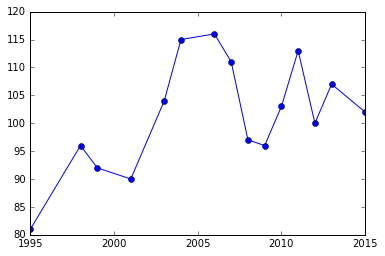

In [41]:
fig = plt.figure()
ax = plt.axes()
ax.plot(pixar_movies["Year Released"], pixar_movies["Length (mins)"],'o-')
plt.show()

To draw more than one line and add legend:

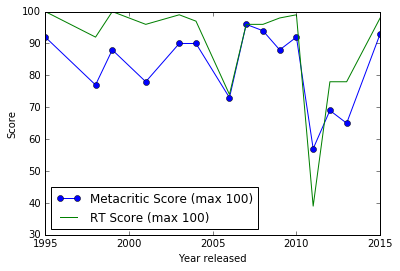

In [42]:
fig = plt.figure()
ax = plt.axes()
ax.plot(pixar_movies["Year Released"], pixar_movies["Metacritic Score (max 100)"],'o-', label="Metacritic Score (max 100)")
ax.plot(pixar_movies["Year Released"], pixar_movies["RT Score (max 100)"], label="RT Score (max 100)")

ax.set_xlabel("Year released")
ax.set_ylabel("Score")

plt.legend(loc="lower left")
plt.show()

plots side by side

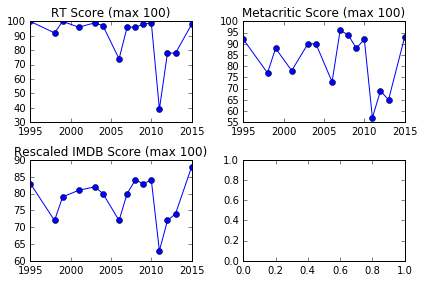

In [43]:
fig, axs = plt.subplots(2, 2)
axs[0][0].plot(pixar_movies["Year Released"], pixar_movies["RT Score (max 100)"],'o-')
axs[0][1].plot(pixar_movies["Year Released"], pixar_movies["Metacritic Score (max 100)"],'o-')
axs[1][0].plot(pixar_movies["Year Released"], pixar_movies["Rescaled IMDB Score (max 100)"],'o-')

axs[0][0].set_title("RT Score (max 100)")
axs[0][1].set_title("Metacritic Score (max 100)")
axs[1][0].set_title("Rescaled IMDB Score (max 100)")

plt.tight_layout()

plot a bar chart

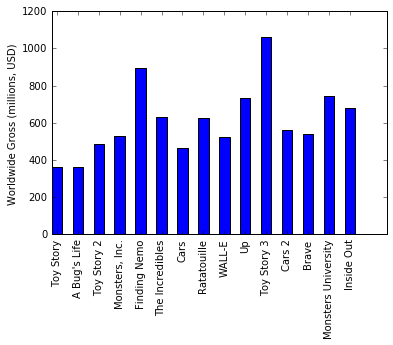

In [44]:
fig, ax = plt.subplots()
ind = np.arange(len(pixar_movies["Movie"]))
width = 0.5
ax.bar(ind, pixar_movies["Worldwide Gross (millions, USD)"], width)
ax.set_xticks(ind + 0.5 * width)
ax.set_xticklabels(pixar_movies["Movie"].values, rotation=90)
ax.set_ylabel("Worldwide Gross (millions, USD)")

In [45]:
import seaborn as sns

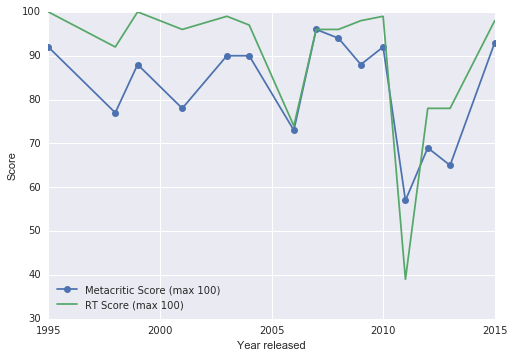

In [46]:
fig = plt.figure()
ax = plt.axes()
ax.plot(pixar_movies["Year Released"], pixar_movies["Metacritic Score (max 100)"],'o-', label="Metacritic Score (max 100)")
ax.plot(pixar_movies["Year Released"], pixar_movies["RT Score (max 100)"], label="RT Score (max 100)")

ax.set_xlabel("Year released")
ax.set_ylabel("Score")

plt.legend(loc="lower left")
plt.show()

plots side by side

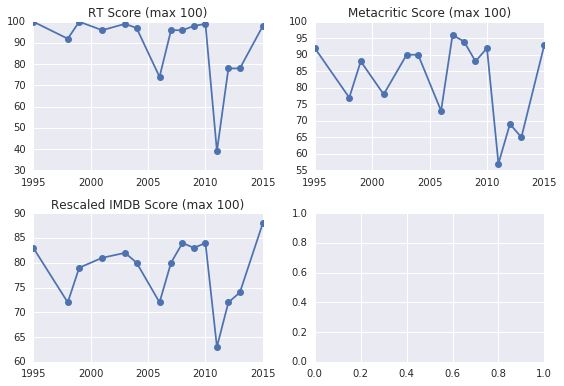

In [50]:
fig, axs = plt.subplots(2, 2)
axs[0][0].plot(pixar_movies["Year Released"], pixar_movies["RT Score (max 100)"],'o-')
axs[0][1].plot(pixar_movies["Year Released"], pixar_movies["Metacritic Score (max 100)"],'o-')
axs[1][0].plot(pixar_movies["Year Released"], pixar_movies["Rescaled IMDB Score (max 100)"],'o-')

axs[0][0].set_title("RT Score (max 100)")
axs[0][1].set_title("Metacritic Score (max 100)")
axs[1][0].set_title("Rescaled IMDB Score (max 100)")

plt.tight_layout()
plt.show()

plot a bar chart

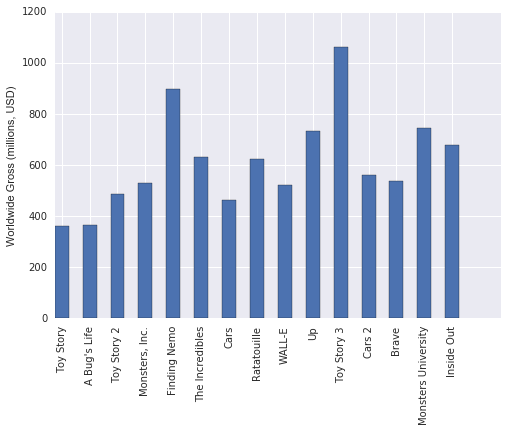

In [49]:
fig, ax = plt.subplots()
ind = np.arange(len(pixar_movies["Movie"]))
width = 0.5
ax.bar(ind, pixar_movies["Worldwide Gross (millions, USD)"], width)
ax.set_xticks(ind + 0.5 * width)
ax.set_xticklabels(pixar_movies["Movie"].values, rotation=90)
ax.set_ylabel("Worldwide Gross (millions, USD)")

plt.show()

In [ ]:
ratio_inflation = pixar_movies["Adjusted Production Budget (millions, USD)"] / pixar_movies["Production Budget (millions, USD)"]
ratio_ticketprice = pixar_movies["Adjusted Domestic Gross (millions, USD)"] / pixar_movies["Domestic Gross (millions, USD)"]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(pixar_movies["Year Released"], ratio_inflation, 'o-', label="Consumer price")
ax.plot(pixar_movies["Year Released"], ratio_ticketprice, 'o-', label="ticket price")
plt.legend()

In [ ]:
pixar_movies.set_index("Movie", inplace=True)

In [ ]:
pixar_movies["Production Budget (millions, USD)"].plot(kind='line', rot=90)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(pixar_movies["Production Budget (millions, USD)"].values, 'o-')
plt.xticks(range(pixar_movies.shape[0]), pixar_movies.index, rotation=90)
plt.ylim(20, 220)
plt.show()

In [ ]:
pixar_movies["Production Budget"].plot(kind='line')
plt.xticks(np.arange(0, 15), pixar_movies.index, rotation='vertical')

In [ ]:
filtered_pixar = pixar_movies.dropna()

In [ ]:
filtered_pixar

In [ ]:
filtered_pixar.loc["Cars"]

In [ ]:
filtered_pixar[["RT Score", "IMDB Score"]]

In [ ]:
critics_reviews = pixar_movies[["RT Score", "IMDB Score", "Metacritic Score"]]

In [ ]:
critics_reviews

In [ ]:
fig = critics_reviews.plot(figsize=(10, 6))
plt.xticks(np.arange(15), critics_reviews.index, rotation='vertical')

In [ ]:
type(fig)

In [ ]:
critics_reviews.plot(kind="box", figsize=(9, 5), sym="k.")

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 12))
critics_reviews.plot(ax=axs[0])
sns.boxplot(data=critics_reviews)

In [ ]:
pixar_movies

In [ ]:
pixar_movies = pixar_movies.sort_values(["Year Released"], ascending=True)

In [ ]:
filtered_pixar = filtered_pixar.sort_values(["Year Released"], ascending=True)

In [ ]:
filtered_pixar

In [ ]:
revenue_proportions = filtered_pixar[["Domestic %", "International %"]]

In [ ]:
revenue_proportions.plot(kind="bar", stacked=True)

In [ ]:
revenue_proportions["Domestic %"] + revenue_proportions["International %"]

In [ ]:
revenue_proportions.loc["Toy Story 2"]

Create a grouped bar plot to explore if there's any correlation between the number of Oscars a movie was nominated for and the number it actually won.<br/>
What plots can you generate to better understand which columns correlate with the Adjusted Domestic Gross revenue column?<br/>